In [16]:
from math import exp
import matplotlib.pyplot as plt
hyperbolic_function = lambda z: np.array(np.exp((2*z)-1))/np.array(np.exp(2*z)+1)
hyperbolic_2nd_function = lambda z: np.array(4*np.exp(2*z))/np.array((1 + np.exp(2*z))**2)

In [17]:
# loading in the data with scipy
from scipy.io import loadmat
data = loadmat('lorenz_mlp_data.mat')

In [18]:
# choosing which category to show
lorenz = data['sig_lorenz']
lorenz

array([[-10.91626086],
       [-10.65440717],
       [-10.1190821 ],
       ...,
       [  6.7254883 ],
       [  8.37992054],
       [  8.67297783]])

In [19]:
# calculating mean of the data
lorenzMean = sum(lorenz)/len(lorenz)
lorenzMean

array([-0.02085328])

In [20]:
# subtracting the mean from the dataset
newLorenz = lorenz - lorenzMean
newLorenz

array([[-10.89540758],
       [-10.63355388],
       [-10.09822882],
       ...,
       [  6.74634159],
       [  8.40077382],
       [  8.69383111]])

In [21]:
# maximum value 
maxi = max(abs(newLorenz))
maxi

array([18.44608317])

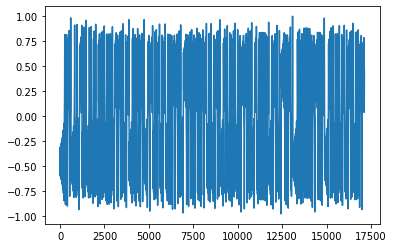

In [22]:
# normalizing data by dividing by max val
newestLorenz = newLorenz/maxi
plt.plot(newestLorenz)

In [23]:
# initializing variables
ni = 20
nh = 200
no = 1
training = 700
testing = 800

In [25]:
# randomly assigning values to the sets
from random import random
w1_nh_ni = np.random.rand(200 , 21)
print(len(w1_nh_ni))
w1_no_nh = np.random.rand(1 , 200)
print(len(w1_no_nh))
dw1_nh_ni = np.random.rand(200 , 21)
print(len(dw1_nh_ni))
dw1_no_nh = np.random.rand(1 , 200)
print(len(dw1_no_nh))
alpha = 0.0

200
1
200
1


In [26]:
# initializing values to be used later
import numpy as np
start_data = 1e-1
end_data = 1e-5
num_epoch = 50
stepsize = (end_data - start_data)/(num_epoch-1);
eta = np.arange(start_data, end_data+stepsize, stepsize)

In [27]:
# calculating variables to be used later
subset_length = ni + no
t = np.arange(0, 0 + subset_length)

# initalizing lists to be written over later
err = np.ones(training)
hid = np.ones(training)
out = np.ones(training)

# variables created from other variables
MSE_threshold = end_data
MSE = start_data
d = np.ones(training)

In [28]:
# initializing in this block of code so that it runs 
# each time without memory of previous lists/values
epoch = 0
mseList = []
epochs = []
while (MSE > MSE_threshold or epoch < num_epoch):
    
    if (epoch >= num_epoch):
        break
        
    for i in range(0, training):
        y = newestLorenz[t+i]
        x = y
        x[-1] = 1
        d[i] = y[0]
        hid = hyperbolic_function((w1_nh_ni).dot(x))
        out[i] = hyperbolic_function(w1_no_nh.dot(hid))
        err[i] = d[i]-out[i]

        delta_out = err[i] * hyperbolic_2nd_function(w1_no_nh.dot(hid))
        delta_hid = (np.array(w1_no_nh) * delta_out).dot(hyperbolic_2nd_function(w1_nh_ni.dot(x)))
        delta_weights_hid = delta_hid.dot(np.array(x).T)
        delta_weights_out = delta_out.dot(np.array(hid).T)
        
        w1_nh_ni_temp = w1_nh_ni + alpha*dw1_nh_ni + eta[epoch] * delta_weights_hid
        w1_no_nh_temp = w1_no_nh + alpha*dw1_no_nh + eta[epoch] * delta_weights_out
        
        mseList.append(sum(err**2)/len(err))
    
    epoch += 1
    epochs.append(epoch)

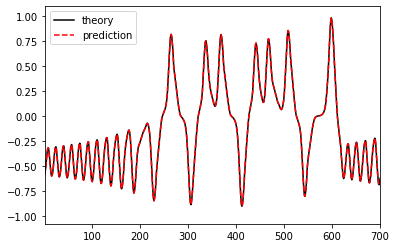

In [29]:
# plotting the values against the true values
plt.plot(newestLorenz, 'k')
plt.plot(d, 'r--')
plt.xlim([1,700])
plt.legend(['theory', 'prediction'])

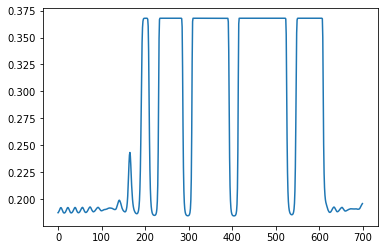

In [30]:
# mroe plotting 
plt.plot(out)

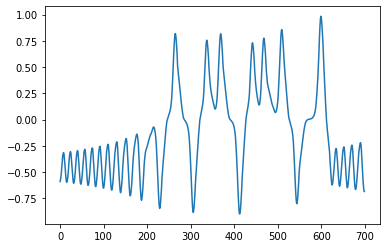

In [31]:
plt.plot(d)

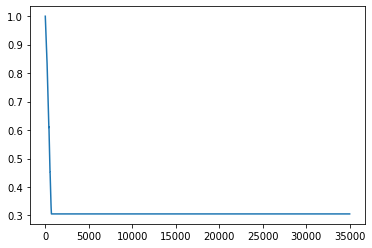

In [35]:
# plotting error
plt.plot(mseList)